## Context 

The city of Milan regularly hosts large events (e.g. football matches, concerts, design week, fashion week...) which often cause mobility-related problems such as traffic congestion and have a negative environmental footprint (emission, poor air quality, etc.). 


The challenge is to help assess the most suitable adaptation of mobility choices during large events, by analysing the effects of the different possible measures e.g. new bus lines targeting the event or new shared mobility services around the venue, the extension of existing bus lines, etc. 


In this notebook, we will take as subject the Olympic Games of 2026 and try to study the needs of the city in relation with this event. 

## Table of Contents
* [Needed packages](#chapter1)
* [Importing data from OpenStreetMap](#chapter2)
    * [Venues based in Milan](#section_2_1)
    * [Creating Pandas DataFrames](#section_2_2)
    * [Data visualization with Folium](#section_2_3)
      * [Plotting maps with Folium](#sub_section_2_3_1)
      * [Folium map customization](#sub_section_2_3_2)
      * [Plotting Markers on the map](#sub_section_2_3_3)
      * [ Folium markers customization](#sub_section_2_3_4)
* [Importing and visualizing data from CKAN](#chapter3)
    * [ Add Linestrings to the Folium map](#section_3_1)

## Needed packages <a class="anchor" id="chapter1"></a>

We start by importing the Python libraries and packages available for performing our (geospatial) analysis. The role of every package will be explained later on this notebook.

Installing Python packages in Anaconda is a simple process that can be done through various methods, such as using the conda command, pip, or the Anaconda Navigator. For more details about these methods, please refer to [this tutorial.](https://www.tutorialspoint.com/how-do-i-install-python-packages-in-anaconda)

In [1]:
import osmnx as ox
import shapely.wkt
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import folium
from branca.element import Figure
from deep_translator import GoogleTranslator

import mpld3
mpld3.enable_notebook() # enable zooming in inline plots

## Importing data from OpenStreetMap <a class="anchor" id="chapter2"></a>

Once we have installed the required Python librairies, we move on to the needed data.

### Venues based in Milan <a class="anchor" id="section_2_1"></a>

According to [the official website of the event](https://milanocortina2026.olympics.com/en/places/milan/), the Olympic games of 2026 in Milan will be maintained in five different places, which are: 

- The **MEAZZA STADIUM** (45.478200349999995, 9.123963993342393)


- The **PALAITALIA SANTA GIULIA**  (45.44027885, 9.250125795075146) (site under construction)


- The **MILANO HOCKEY ARENA (The PalaSharp HALL)** (45.49118265, 9.129188142110713) 



- The **FORUM DI ASSAGO** (45.40135925, 9.14230183345828)



- The **PIAZZA DUOMO** (45.463910150000004, 9.190642626255652)

Note that the coordinates of the reffered places were extracted thanks to the [Nominatim interface](https://nominatim.openstreetmap.org/ui/search.html), which is a tool to search OpenStreetMap (OSM) data by name and address and to generate synthetic addresses of OSM points (reverse geocoding).


**OpenStreetMap** is a free, editable map of the whole world that is being built by volunteers largely from scratch and released with an open-content license. It allows free access to map images and underlying map data. 

For more informations about OSM, please have a look at [this website](https://wiki.openstreetmap.org/wiki/About_OpenStreetMap#:~:text=OpenStreetMap%20is%20a%20free%2C%20editable,of%20our%20underlying%20map%20data).

### Creating Pandas Dataframes <a class="anchor" id="section_2_2"></a>

To be able to manipulate our data, we need to store them in a format recognizable by Python. For this, we use **Pandas**, a Python library for data analysis. 

Pandas introduced two new types of objects for storing data that make analytical tasks easier and eliminate the need to switch tools: Series, which have a list-like structure, and DataFrames, which have a tabular structure. 

For more details about the use of this library, please refer to [the official user guide.](https://pandas.pydata.org/docs/user_guide/index.html)

In our case, we will first be using a DatfFrame. We start by storing the information we have previously extracted with nominatim in lists, and then we use theses lists to create our Dataframe.

In [2]:
# Creation of lists based on data extracted with Nominatim

names = ['MEAZZA STADIUM', 'PALAITALIA SANTA GIULIA', 'MILANO HOCKEY ARENA', 'FORUM DI ASSAGO', 'PIAZZA DUOMO']
adresses = [(45.478200349999995, 9.123963993342393), (45.44027885, 9.250125795075146), (45.49118265, 9.129188142110713), (45.40135925, 9.14230183345828), (45.463910150000004, 9.190642626255652)]

In [3]:
# Dataframe creation
df1 = pd.DataFrame(list(zip(names, adresses)), columns = ['name','adress'])

df1.head() # Visualization of the first rows of the Dataframe

,name,adress
0,MEAZZA STADIUM,"(45.478200349999995, 9.123963993342393)"
1,PALAITALIA SANTA GIULIA,"(45.44027885, 9.250125795075146)"
2,MILANO HOCKEY ARENA,"(45.49118265, 9.129188142110713)"
3,FORUM DI ASSAGO,"(45.40135925, 9.14230183345828)"
4,PIAZZA DUOMO,"(45.463910150000004, 9.190642626255652)"


### Data visualization with Folium <a class="anchor" id="section_2_3"></a>

To have a better understanding of the dataset we just created, we use one of the many Python librairies for data visualization - That is the Folium library.


**Folium** is used for visualizing geospatial data. It is an esay-to-use Python wrapper for [Leaflet.js](https://leafletjs.com/), which is a leading open-source JavaScript library for plotting interactive maps.

#### Plotting maps with Folium <a class="anchor" id="sub_section_2_3_1"></a>

Folium provides the folium.Map() class which takes location parameter in terms of latitude and longitude and generates a map around it. So, let’s plot a map of Milan with latitude and longitude as 45.4641943 and 9.1896346 respectively:

In [4]:
# Make an empty map
m = folium.Map(location=[45.4641943, 9.1896346])

# Show the map
m

You can see that these maps are interactive. You can zoom in and out by clicking the positive and negative buttons in the top-left corner of the map. You can also drag the map and see different regions.

#### Folium map customization  <a class="anchor" id="sub_section_2_3_2"></a>

To customize our map, we can for exemple **reduce the height and width of the map**, and/or **change the zoom level**.


We can resize our map by using the branca library in Python. It is a spinoff from Folium that hosts the non-map specific features. We can use its Figure class for resizing our maps and pass the desired width and height in pixels.


Concerning the zoom level, by default, we can zoom in and out as much as we want. Also, the starting zoom level is fixed to 10 (the map is plotted with a 10x zoom). This is practical if we want to plot a map of a small area. Here, we need to mention the appropriate starting zoom level so that the map focuses only on that region. Also, if we don’t want them to zoom in or out much and lose focus on the map, then we can restrict it. For doing this, Folium gives us three parameters – zoom_start, min_zoom, and max_zoom.


So, let us again plot the map of Milan but this time of fixed size and with a restricted zoom level:

In [5]:
#reduce the height and width of the map
fig=Figure(width=550,height=350)

#change the zoom level
m1=folium.Map(width=550,height=350,location=[45.4641943, 9.1896346],zoom_start=11,min_zoom=8,max_zoom=14)
fig.add_child(m1)

# Show the map
m1

We can see here that we cannot zoom in and out after a certain level. Notice also that we need to pass the map as a child to the fig object for resizing the map.

#### Plotting Markers on the map <a class="anchor" id="sub_section_2_3_3"></a>

Markers are the items used for marking a location on a map. Folium gives a folium.Marker() class for plotting them. For that, we just need to pass the latitude and longitude of the location, mention the popup and tooltip and add it to the map.

Plotting markers is a two-step process. First, we need to create a base map on which your markers will be placed (which we did in the preivous steps), and then add ours markers to it:

In [6]:
# add marker one by one on the map
 
for i in range(0,len(df1)):
    folium.Marker(
      location=[df1.iloc[i]['adress'][0], df1.iloc[i]['adress'][1]],
      popup=df1.iloc[i]['name'], icon=folium.Icon(color='red')
   ).add_to(m1)

# Show the map
m1

#### Folium markers customization <a class="anchor" id="sub_section_2_3_4"></a>

There are two things that we can customize to change the appearance of a marker.First, we can change the icon of the marker, and second, you can change the shape of the marker. Folium gives the folium.Icon() class which can be used for creating custom icons for markers. You can choose icons from a wide range of options.

Icon() takes three arguments – color, prefix and icon. Color is used for changing the color of the marker, the prefix is used for selecting the icon provider, and the icon is used for selecting the icon name.

### Importing and visualizing data from CKAN <a class="anchor" id="chapter3"></a>

Now that we have extracted the all the data we needed from OpenStreetMap, we can focus on the data provided by our CKAN datalogue.


As we mentionned earlier in this notebook, we are interested in data related to public/private transports in Milan. This includes bus/metro/tram schedules, tourists buses, and so on.

#### ATM - Underground lines routes

At this point, we are going to analyse the underground lines routes in Milan.

Once we are in our CKAN portal, we click on the "Datasets" tab. From there, we search for the "ATM- Underground lines routes" in the search bar.The results are different data sources listed as bellow:

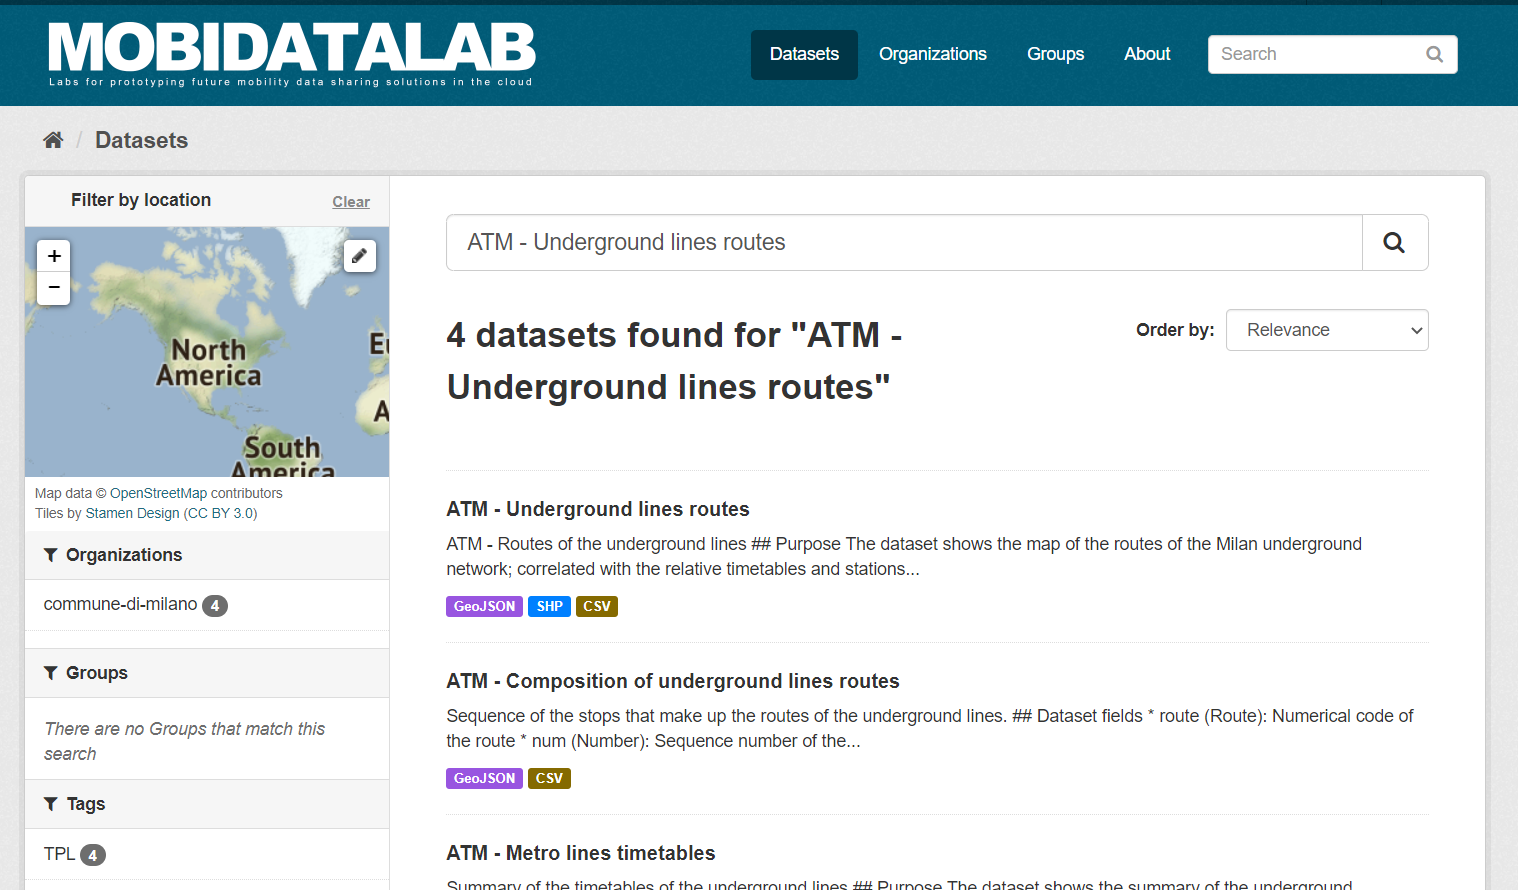

In our example, we select the first source, which contains three different datasets, all in diffrent formats: GeoJSON, SHP and CSV.

When we click on the first datast (the GeoJSON one), we get additional information about the resource, including the url that will allow us to access our data. We will then copy this URL, access it and store the information it contains in a GeoDataFrame -  a pandas. DataFrame that has a column with geometry. 

To manipulate GeoDataFrames, we use the Python library **geopandas**, which provides geospatial operations in pandas and a high-level interface to multiple geometries. GeoPandas also enables us to easily do operations in python that would otherwise require a spatial database.

In [7]:
# URL of the dataset

URL = 'https://dati.comune.milano.it/dataset/5d24ff16-26c7-4f3a-98dd-b5b8f0b65003/resource/df024fd8-9c4e-4e22-a39e-7e91295b7a7b/download/tpl_metropercorsi.geojson'

In [8]:
# Data extraction and storage in a GeoDataFrame
try:
    df = gpd.read_file(URL)
except Exception as e:
    print('Sorry, could not handle the geojson file. Error : ' + str(e)) 

In [9]:
# Presentation of the first five rows of the GoDataFrame
df.head()

,linea,mezzo,percorso,nome,lung_km,num_ferm,geometry
0,1,METRO,100002,BISCEGLIE - SESTO 1 MAGGIO FS,16.38,27,"LINESTRING (9.11291 45.45539, 9.11648 45.45607..."
1,1,METRO,100013,MOLINO DORINO - SESTO 1 MAGGIO FS,19.18,29,"LINESTRING (9.09291 45.50522, 9.09521 45.50478..."
2,1,METRO,100023,QT8 - SESTO 1 MAGGIO FS,15.07,24,"LINESTRING (9.13713 45.48595, 9.14363 45.47922..."
3,1,METRO,100030,RHO FIERAMILANO - SESTO 1 MAGGIO FS,21.16,31,"LINESTRING (9.08710 45.51981, 9.08653 45.51680..."
4,1,METRO,100033,SESTO 1 MAGGIO FS - BISCEGLIE,16.38,27,"LINESTRING (9.23834 45.54170, 9.23672 45.54001..."


We notice that the geometry column contains object of the type *LINSTRING*, which is a geometry type composed of one or more line segments.

this geometry type, among others, belongs to a Python package named **Shapely**, for manipulation and analysis of planar geometric objects. The package includes functions for creating geometries, as well as functions for applying geometric operations on geometries (such as calculating the centroid of a polygon, etc.). 

More details about this package can be found [here.](https://shapely.readthedocs.io/en/stable/index.html)

#### Add Linestrings to the Folium map  <a class="anchor" id="section_3_1"></a>

We take our previous map and display our GeoDataFrame on it:

In [10]:
for _, r in df.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j)
    folium.Popup(r['nome']).add_to(geo_j)
    geo_j.add_to(m1)
m1

#### Reserved stop for Bus GT (tourists buses)

We take back the previous example and do the exact same steps but for the tourists buses instead (name of the dataset on CKAN: ' Reserved stop for Bus GT').

In [11]:
# URL of the dataset
URL = 'https://dati.comune.milano.it/dataset/a2d017e4-8b44-49c4-b1f7-856da9ea74a4/resource/c3b4ecc0-0568-43f4-83a9-0ba92e586f94/download/sosta_turistici.geojson'

In [12]:
# Data extraction and storage in a GeoDataFrame
try:
    df1 = gpd.read_file(URL)
except Exception as e:
    print('Sorry, could not handle the geojson file. Error : ' + str(e)) 

In [13]:
df1.head()

,id_amat,tipo_sosta,via_id,localizzaz,num_stalli,tipologia,note,regole,costo_ora,num_prog,provenienza,geometry
0,1,BREVE,2103,VIA MARINA,5,su strada,NaN,8-24,0,1,dentro,POINT (9.19833 45.47071)
1,2,BREVE,704,PIAZZA CASTELLO,2,su strada,NaN,0-24,0,2,dentro,POINT (9.18022 45.47183)
2,5,BREVE,711,FORO BUONAPARTE,8,su strada,NaN,0-24,0,2,dentro,POINT (9.18125 45.47265)
3,9,BREVE,144,VIA FATEBENEFRATELLI,1,su strada,NaN,8-24,0,3,dentro,POINT (9.18872 45.47308)
4,6,BREVE,1052,VIA MANIN,3,su strada,NaN,8-24,0,4,dentro,POINT (9.19726 45.47586)


**Position and characteristics of the parking spaces reserved for GT tourist buses:**

- **id_amat:** ID of the lay-by
- **tipo_sosta (Type of stop):** Type of stop (short, long)
- **via_id:** Street code from toponymy  
- **localizzaz:** Localization (street name) 
- **num_stalls:** Number of stalls  
- **tipologi:** Type of area (on the road, parking area, closed area)
- **regole (Rules):** Time regulation  
- **costo_ora:**: Hourly cost
- **num_prog:** Progressive number
- **provenienza (Provenance):** Origin (inside, outside) 
- **geom (Geometry):** Point geometry  

In [14]:
# add marker one by one on the map
for i in range(0,len(df1)):
    folium.Marker(
      location=[df1.iloc[i]['geometry'].y, df1.iloc[i]['geometry'].x],
      popup=df1.iloc[i]['localizzaz'],
   ).add_to(m1)

# Show the map
m1

#### What’s Next?


You are now familiar with the concepts of (Geo)DataFrames and Folium, you can use them to further explore the datasets in our CKAN. Have fun!